# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
#Your code here
type(data)

dict

In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [5]:
for key in data.keys():
    print(type(data[key]))

<class 'dict'>
<class 'list'>


In [12]:
data['meta'].keys()

dict_keys(['view'])

In [19]:
data['meta']

{'view': {'id': 'g4ie-h725',
  'name': 'U.S. Chronic Disease Indicators (CDI)',
  'attribution': 'Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Division of Population Health',
  'attributionLink': 'http://www.cdc.gov/nccdphp/dph/',
  'averageRating': 0,
  'category': 'Chronic Disease Indicators',
  'createdAt': 1463517008,
  'description': "CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas. In addition to providing access to state-specific indicator data, the CDI web site serves as a gateway to additional information and data resources.",
  'displayType': 'table',
  'downloadCount': 80068,
  'hideFromCatalog': False,
  

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [27]:
print(type(data['meta']['view']))

<class 'dict'>


In [28]:
print(type(data['data']))

<class 'list'>


In [30]:
data['data'][0]
print(len(data['data']))

60266


In [33]:
data['data'][0]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

In [37]:
#Your code here
df = pd.DataFrame(data['data'])
df.columns = [i['name'] for i in data['meta']['view']['columns']]
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60266 entries, 0 to 60265
Data columns (total 42 columns):
sid                          60266 non-null int64
id                           60266 non-null object
position                     60266 non-null int64
created_at                   60266 non-null int64
created_meta                 60266 non-null object
updated_at                   60266 non-null int64
updated_meta                 60266 non-null object
meta                         0 non-null object
YearStart                    60266 non-null object
YearEnd                      60266 non-null object
LocationAbbr                 60266 non-null object
LocationDesc                 60266 non-null object
DataSource                   60266 non-null object
Topic                        60266 non-null object
Question                     60266 non-null object
Response                     0 non-null object
DataValueUnit                60158 non-null object
DataValueType                60266 n

In [38]:
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


In [42]:
df.LocationDesc.iloc[8]

'Delaware'

In [43]:
pd.set_option('display.max_columns', None)
df

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,16.9,16.9,*,50 States + DC: US Median,16,18,Overall,Overall,None,None,None,None,"[None, None, None, None, None]",None,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,13,13,None,None,11.9,14.1,Overall,Overall,None,None,None,None,"[None, 32.84057112200048, -86.63186076199969, ...",None,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,18.2,18.2,None,None,16,20.6,Overall,Overall,None,None,None,None,"[None, 64.84507995700051, -147.72205903599973,...",None,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15.6,15.6,None,None,14.3,16.9,Overall,Overall,None,None,None,None,"[None, 34.865970280000454, -111.76381127699972...",None,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,None,%,Crude Prevalence,15,15,None,None,13,17.2,Overall,Overall,None,None,None,None,"[None, 34.74865012400045, -92.27449074299966, ...",None,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60261,519150,1B28C1DD-B25F-457E-86E4-7D1463BE82C3,519150,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Disability,Disability among adults aged >= 65 years,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,"Asian, non-Hispanic",None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,DIS,DIS1_0,CRDPREV,RACE,ASN,None,None,None,None
60262,519704,4FF6ADF8-CC4B-4D94-A5B0-7766346A0D3E,519704,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Overarching Conditions,Poverty,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,"Black, non-Hispanic",None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,OVC,OVC3_1,CRDPREV,RACE,BLK,None,None,None,None
60263,519705,02896705-4A9F-45A2-A84B-923DEA6DC6A2,519705,1527194644,959778,1527194644,959778,None,2016,2016,PR,Puerto Rico,ACS 1-Year Estimates,Overarching Conditions,Poverty,None,%,Crude Prevalence,None,None,~,Data not shown because of too few respondents ...,None,None,Race/Ethnicity,American Indian or Alaska Native,None,None,None,None,"[None, 18.220833, -66.590149, None, False]",None,72,OVC,OVC3_1,CRDPREV,RACE,AIAN,None,None,None,None
60264,519706,4DF2E74C-5043-474B-9739-98B4D8736BDB,519706,1527194644

In [49]:
df.LocationDesc.value_counts()

Pennsylvania            1109
Iowa                    1109
Maine                   1109
Rhode Island            1109
New York                1109
Michigan                1109
Mississippi             1109
Missouri                1109
Arizona                 1109
Idaho                   1109
Georgia                 1109
Delaware                1109
Oregon                  1109
Massachusetts           1109
New Mexico              1109
Maryland                1109
Virginia                1109
Kansas                  1109
California              1109
Illinois                1109
Nebraska                1109
Minnesota               1109
Tennessee               1109
Oklahoma                1109
Arkansas                1109
Connecticut             1109
Alaska                  1109
Wisconsin               1109
Hawaii                  1109
Ohio                    1109
District of Columbia    1109
North Carolina          1109
Puerto Rico             1109
New Jersey              1109
Utah          

In [74]:
just_states = df[df.LocationDesc != 'United States']
just_asthma = just_states[just_states.Topic == 'Asthma']
ja_converted = just_asthma.astype({'DataValue':'float64'}, copy=False)
ja_converted.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4644 entries, 4725 to 14053
Data columns (total 42 columns):
sid                          4644 non-null int64
id                           4644 non-null object
position                     4644 non-null int64
created_at                   4644 non-null int64
created_meta                 4644 non-null object
updated_at                   4644 non-null int64
updated_meta                 4644 non-null object
meta                         0 non-null object
YearStart                    4644 non-null object
YearEnd                      4644 non-null object
LocationAbbr                 4644 non-null object
LocationDesc                 4644 non-null object
DataSource                   4644 non-null object
Topic                        4644 non-null object
Question                     4644 non-null object
Response                     0 non-null object
DataValueUnit                4644 non-null object
DataValueType                4644 non-null object

In [75]:
ja_converted.isna().sum()

sid                             0
id                              0
position                        0
created_at                      0
created_meta                    0
updated_at                      0
updated_meta                    0
meta                         4644
YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
Topic                           0
Question                        0
Response                     4644
DataValueUnit                   0
DataValueType                   0
DataValue                    2055
DataValueAlt                 2055
DataValueFootnoteSymbol      2588
DatavalueFootnote            2588
LowConfidenceLimit           2056
HighConfidenceLimit          2056
StratificationCategory1         0
Stratification1                 0
StratificationCategory2      4644
Stratification2              4644
StratificationCategory3      4644
Stratification

## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

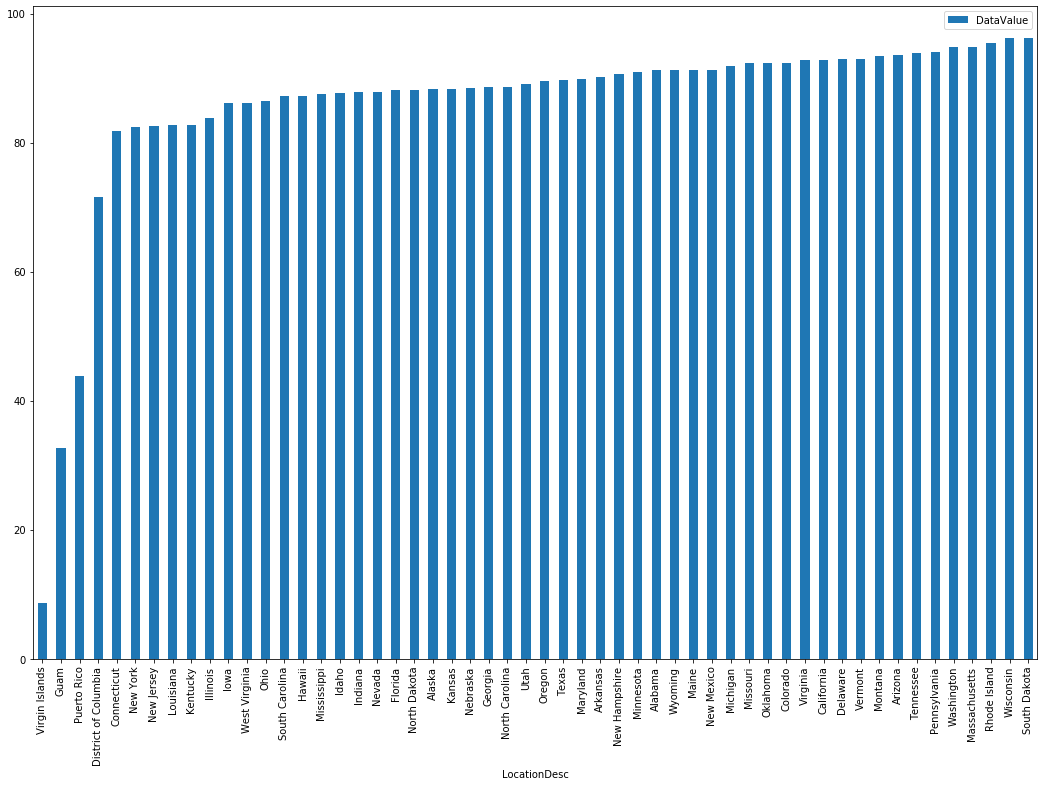

In [80]:
ja_converted.groupby('LocationDesc').max().sort_values(by='DataValue').plot.bar(y='DataValue', figsize=(18,12))

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!